<a href="https://colab.research.google.com/github/MariiaKalinina/Skoltech/blob/main/GSA_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from math import *
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

In [ ]:
# Define the function to be integrated
def integrand(θ, φ):
    # Define your function here
    return θ**2 + φ**2  # For example, replace with your actual function

# Define the grid parameters for θ and φ
θ_min, θ_max = 0, np.pi
φ_min, φ_max = 0, 2*np.pi

# Perform the double integration using the rectangular method

result, _ = dblquad(integrand, θ_min, θ_max, lambda θ: φ_min, lambda θ: φ_max)
print(result)

324.6969701133415


In [ ]:
import numpy as np

# Define the function to be integrated
def integrand(θ, φ):
    # Define your function here
    return θ**2 + φ**2  # For example, replace with your actual function

# Define the grid parameters for θ and φ
θ_grid = np.arange(0, np.pi, 0.002)
φ_grids = [[np.arange(0, 1.5, 0.01)], [np.arange(1.5, 1.64, 0.0005)], [np.arange(1.64, 4.64, 0.01)], [np.arange(4.64, 4.78, 0.0005)], [np.arange(4.78, 6.28, 0.01)]]

# Perform the double integration using the rectangular method
a = []
for φ_grid in φ_grids:
    result = 0
    for i in range(len(θ_grid) - 1):
        for j in range(len(φ_grid[0]) - 1):
            Δθ = θ_grid[i + 1] - θ_grid[i]
            Δφ = φ_grid[0][j + 1] - φ_grid[0][j]
            θ = (θ_grid[i] + θ_grid[i + 1]) / 2
            φ = (φ_grid[0][j] + φ_grid[0][j + 1]) / 2
            result += integrand(θ, φ) * Δθ * Δφ

    for k in range(1, len(φ_grid)):
        for i in range(len(θ_grid) - 1):
            for j in range(len(φ_grid[k]) - 1):
                Δθ = θ_grid[i + 1] - θ_grid[i]
                Δφ = φ_grid[k][j + 1] - φ_grid[k][j]
                θ = (θ_grid[i] + θ_grid[i + 1]) / 2
                φ = (φ_grid[k][j] + φ_grid[k][j + 1]) / 2
                result += integrand(θ, φ) * Δθ * Δφ

    a.append(result)
    # print(f"The result for φ grid {φ_grid} is: {result}")
print(a)
print(sum(a))

[18.838654258800233, 2.51966670946664, 130.1237239588016, 11.197608270968603, 159.05910341879462]
321.73875661683167


# Нотация фойта из тензора (3x3x3x3) в матрицу (6х6)

In [ ]:
# Make matrix or tensor from initial data

def from_3x3x3x3_to_6x6(c11, c44, c12):

        C6x6 = np.zeros((6,6))

        C6x6[0,0] = c11
        C6x6[0,1] = c12
        C6x6[0,2] = c12
        C6x6[1,0] = c12
        C6x6[1,1] = c11
        C6x6[1,2] = c12
        C6x6[2,0] = c12
        C6x6[2,1] = c12
        C6x6[2,2] = c11
        C6x6[3,3] = c44
        C6x6[4,4] = c44
        C6x6[5,5] = c44

        return np.round(C6x6, 2)

def from_6x6_to_3x3x3x3(c11, c44, c12):

    Ckmln = np.zeros((3,3,3,3))

    for i in range(3):
        for j in range(3):
            for k in range(3):
                for m in range(3):

                    if i == 0 and j == 0:
                        x = 0
                    elif i == 1 and j == 1:
                        x = 1
                    elif i == 2 and j == 2:
                        x = 2
                    elif (i == 1 and j == 2) or (i == 2 and j == 1):
                        x = 3
                    elif (i == 0 and j == 2) or (i == 2 and j == 0):
                        x = 4
                    elif (i == 0 and j == 1) or (i == 1 and j == 0):
                        x = 5


                    if k == 0 and m == 0:
                        y = 0
                    elif k == 1 and m == 1:
                        y = 1
                    elif k == 2 and m == 2:
                        y = 2
                    elif (k== 1 and m == 2) or (k == 2 and m == 1):
                        y = 3
                    elif (k == 0 and m == 2) or (k == 2 and m == 0):
                        y = 4
                    elif (k == 0 and m == 1) or (k == 1 and m == 0):
                        y = 5

                    Ckmln[i,j,k,m] = from_3x3x3x3_to_6x6(c11, c44, c12)[x,y]

    # return torch.from_numpy(np.round((Ckmln), 2)) #torch type
    return np.round((Ckmln), 2) # numpy type

### Исходные данные

In [ ]:
"""Матрица"""
M_C11 = 76
M_C44 = 20
M_C12 = 31


Fl_C11 = 10
Fl_C44 = 0
Fl_C12 = 0

C_mtrx = from_6x6_to_3x3x3x3(M_C11, M_C44, M_C12)
C_fl = from_6x6_to_3x3x3x3(Fl_C11, Fl_C44, Fl_C12)
C_c = C_mtrx*0.2+C_fl*0.8


# """Матрица как у ИО"""
# M_C11 = 136
# M_C12 = 33
# M_C44 = 12

# Анализ подинтеральной функции

In [ ]:
def givenFunction(C_c,θ,φ,ar):

  n_t = np.array([[((np.sin(θ) * np.cos(φ))*ar[0]**-1),
                    (np.sin(θ) * np.sin(φ))*ar[1]**-1,
                    (np.cos(θ)*ar[2]**-1)]])
  n = n_t.T @ n_t
  λ = np.linalg.inv(np.einsum('imjn,mn->ij', C_c, n))

  return np.einsum('mn,ij -> imjn', n, λ)*np.sin(θ)

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def function_3d(comp):
    comp_minus_1 = list(map(lambda x: tuple([i - 1 for i in x]), comp))
    N = 1000
    θ = np.linspace(0, np.pi, N)
    φ = np.linspace(0, 2*np.pi, N)
    X, Y = np.meshgrid(φ, θ)

    for ij in comp_minus_1:

        fig = plt.figure(figsize=(8,8))
        ax1 = fig.add_subplot(111,projection="3d")

        Z = np.empty([len(φ), len(θ)])
        for i in np.arange(len(φ)):
            for j in np.arange(len(θ)):
                Aikjl = givenFunction(C_c, Y[i,j], X[i, j], AR)
                Z[i,j] = Aikjl[ij]


  ### Точки интегрировния

        # Z_points= np.empty([len(φ), len(θ)])
        # for i in np.arange(len(φ)):
        #     for j in np.arange(len(θ)):
        #         Aikjl_points = givenFunction(C_c, Y[i,j], X[i, j], AR)
        #         Z_points[i,j] = Aikjl_points[ij]

        ij = [x+1 for x in ij]
        ax1.plot_surface(X, Y, Z, cmap='RdBu')
        # ax1.scatter(X, Y, Z_points, color='red', s=5)

        ax1.set_xlabel('$\phi$')
        ax1.set_ylabel('$\Theta$')
        ax1.set_zlabel('Given func $A_{ijkl}$')
        ax1.set_title(ij)
        # ax1.set_ylim([1.45, 1.7])

        plt.show()
        plt.savefig(f'3d_plot_{ij}.png')  # Save the plot with a different name

        plt.close(fig)  # Close the figure to release memory


def function_2d(comp):
  comp_minus_1 = list(map(lambda x: tuple([i - 1 for i in x]), comp))
  for ij in comp_minus_1:

    figure, axis = plt.subplots(1, 2, figsize=(10, 6))
    figure.tight_layout(pad=8.0)

    N=1000

    y_list_theta = []
    for x in np.linspace(0, np.pi, N):
      y_list_theta.append(givenFunction(C_c, x, 1.57, AR)[ij])

    axis[0].scatter(np.linspace(0, np.pi, N), y_list_theta)
    axis[0].set_xlabel('$\Theta$')
    axis[0].set_ylabel('Y Label')
    axis[0].set_title([x+1 for x in ij])
    axis[0].set_xlim([1.2, 1.8])


    y_list_phi = []
    for x in np.linspace(0, 2*np.pi, N):
      y_list_phi.append(givenFunction(C_c, 2.51, x, AR)[ij])

    axis[1].scatter(np.linspace(0, 2*np.pi, N), y_list_phi)
    axis[1].set_xlabel('$\phi$')
    axis[1].set_ylabel('Y Label')
    axis[1].set_title([x+1 for x in ij])
    plt.show()
    plt.savefig(f'2d_plot_{[x+1 for x in ij]}.png')  # Save the plot with a different name
    # plt.close(figure)  # Close the figure to release memory

In [ ]:
        ###  Non-zero components

# comp = [[1,1,1,1], [2,2,2,2], [3,3,3,3]] #C11

# comp = [[1,1,2,2], [1,1,3,3], [2,2,1,1], [2,2,3,3], [3,3,1,1], [3,3,2,2]] #C12

# comp = [[2,3,2,3], [3,2,3,2], [2,3,3,2], [3,2,3,2], [1,3,1,3], [3,1,3,1],\
#         [3,1,1,3], [1,3,3,1], [1,2,1,2], [2,1,2,1], [2,1,1,2], [1,2,2,1]] #C44

In [ ]:
comp = [[1,1,2,2], [3,3,1,1], [3,1,3,1], [1,2,1,2]] #C11
AR = [1000,1000,1]

KeyboardInterrupt: 

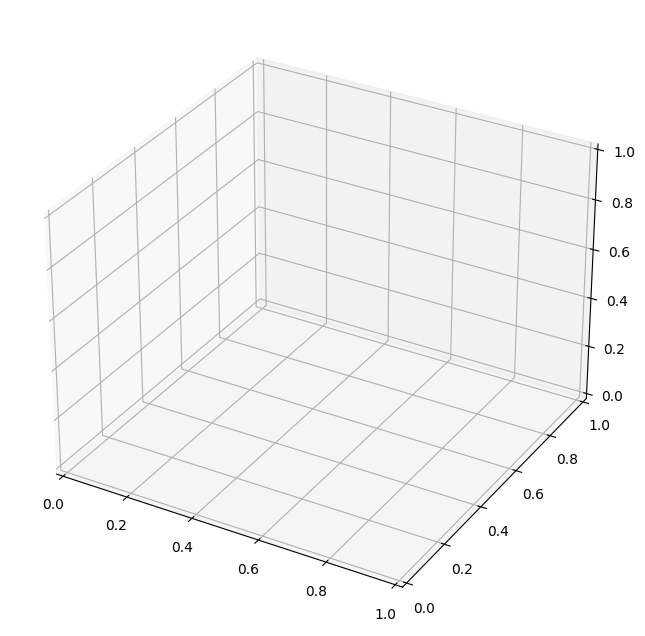

In [ ]:
function_3d(comp)
function_2d(comp)

# Анализ количества точек, который используется при интегрировании разными методами

In [ ]:
def givenFunction(C_c,θ,φ,ar):

  value_θ.append(θ)
  value_φ.append(φ)

  n_t = np.array([[((np.sin(θ) * np.cos(φ))*ar[0]**-1),
                    (np.sin(θ) * np.sin(φ))*ar[1]**-1,
                    (np.cos(θ)*ar[2]**-1)]])
  n = n_t.T @ n_t
  λ = np.linalg.inv(np.einsum('imjn,mn->ij', C_c, n))

  a = np.einsum('mn,ij -> imjn', n, λ)*np.sin(θ)
  res.append(a[0,0,0,0])

  return np.einsum('mn,ij -> imjn', n, λ)*np.sin(θ)

### Численный метод трапеции

In [ ]:
def integration_tr(C_c, ar):

    A_klnm = np.empty((3, 3, 3, 3))

    # Define the limits of integration
    a, b = 0, np.pi
    # a, b = 1.57, 1.57 #θ

    c, d = 0, 2*np.pi #φ
    # c, d = 1.57, 1.57 #φ


    m, n = 100, 100  # Number of steps
    # m, n = 2, 30000  # Number of steps
    dx = (b - a) / m
    dy = (d - c) / n

    result = 0

    for ii in range(1, m):
      for jj in range(1, n):
        # print(a + ii * dx,  c + jj * dy)
        givenFunction(C_c, a + ii * dx, c + jj * dy,ar)

    return A_klnm

In [ ]:
value_θ, value_φ, res = [], [], []

In [ ]:
AR = [1, 1, 1]
AA = integration_tr(C_c, AR)

In [ ]:
len(value_θ), len(res)

(9801, 9801)

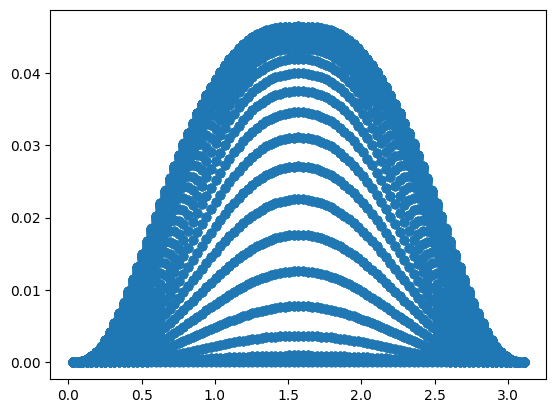

In [ ]:
plt.scatter(value_θ,res)

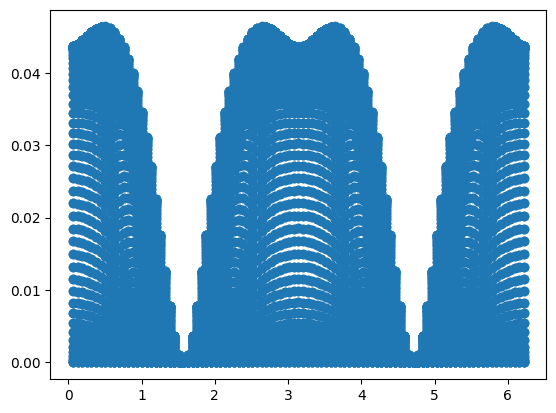

In [ ]:
plt.scatter(value_φ,res)

###**Анализ "Кол-во точек интегирование - макс/мин значение подинтегральной функции Cij"**

In [ ]:
def givenFunction(C_c,θ,φ,ar,comp):

  value_θ.append(θ)
  value_φ.append(φ)

  n_t = np.array([[((np.sin(θ) * np.cos(φ))*ar[0]**-1),
                    (np.sin(θ) * np.sin(φ))*ar[1]**-1,
                    (np.cos(θ)*ar[2]**-1)]])
  n = n_t.T @ n_t
  λ = np.linalg.inv(np.einsum('imjn,mn->ij', C_c, n))

  a = np.einsum('mn,ij -> imjn', n, λ)*np.sin(θ)

  res.append(a[comp])

  return np.einsum('mn,ij -> imjn', n, λ)*np.sin(θ)

In [ ]:
def integration_tr_n(C_c, ar, N, comp):

    A_klnm = np.empty((3, 3, 3, 3))

    # Define the limits of integration
    a, b = 0, np.pi
    # a, b = 1.57, 1.57 #θ

    c, d = 0, 2*np.pi #φ
    # c, d = 1.57, 1.57 #φ


    m, n = N, N  # Number of steps
    # m, n = 2, 30000  # Number of steps
    dx = (b - a) / m
    dy = (d - c) / n

    result = 0

    for ii in range(1, m):
      for jj in range(1, n):
        # print(a + ii * dx,  c + jj * dy)
        givenFunction(C_c, a + ii * dx, c + jj * dy,ar, comp)

    return A_klnm

In [ ]:
value_θ, value_φ, res = [], [], []

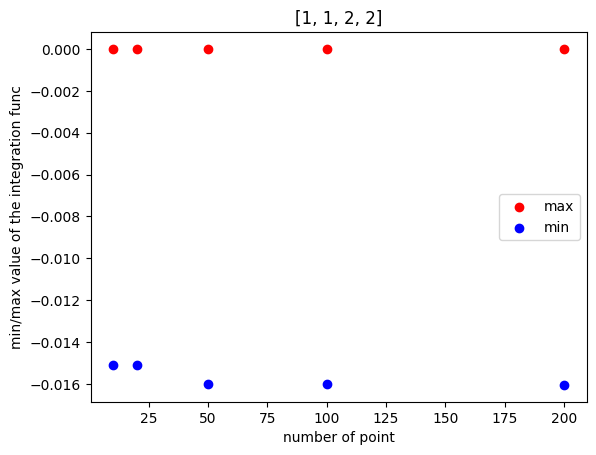

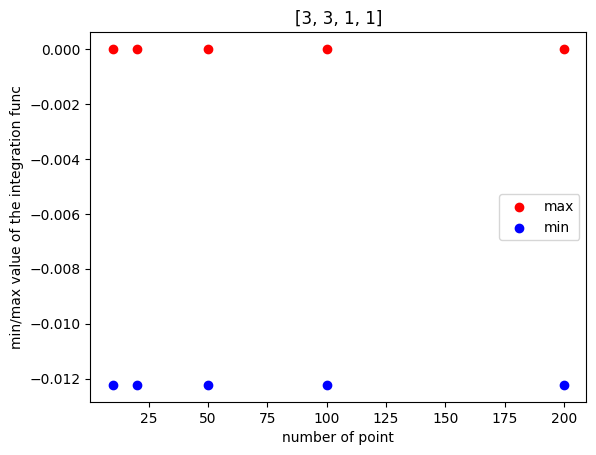

In [ ]:
# N = np.arange(100, 1100, 100)
N = [10, 20, 50, 100, 200]
AR = [1, 1, 1]

comp = [[1,1,2,2], [3,3,1,1]]
comp_minus_1 = list(map(lambda x: tuple([i - 1 for i in x]), comp))
# comp = [[1,1,2,2], [3,3,1,1], [3,1,3,1], [1,2,1,2]] #C11

for ij in comp_minus_1:

  min_value, max_value = [], []

  for i in N:

    value_θ, value_φ, res = [], [], []
    integration_tr_n(C_c, AR, i, ij)
    max_value.append(max(res))
    min_value.append(min(res))

  plt.scatter(N, max_value, color='red', label='max')
  plt.scatter(N, min_value, color='blue', label='min')
  plt.title([x+1 for x in ij])
  plt.ylabel('min/max value of the integration func')
  plt.xlabel('number of point')
  plt.legend()
  plt.show()

In [ ]:
np.arange(50, 550, 100)

array([ 50, 150, 250, 350, 450])

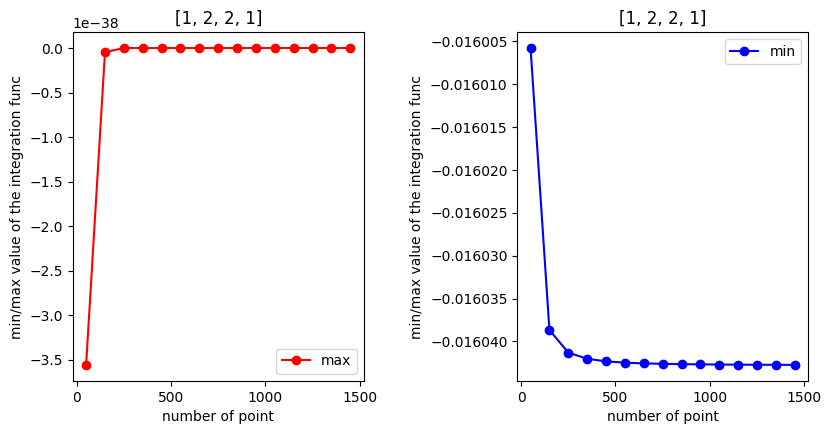

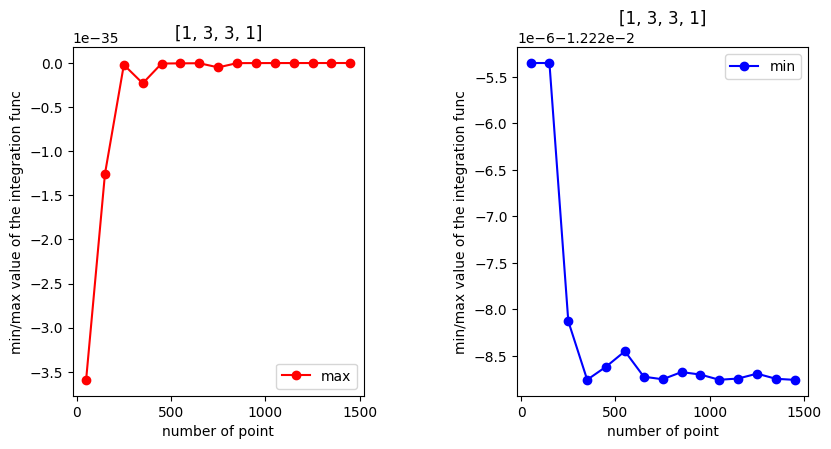

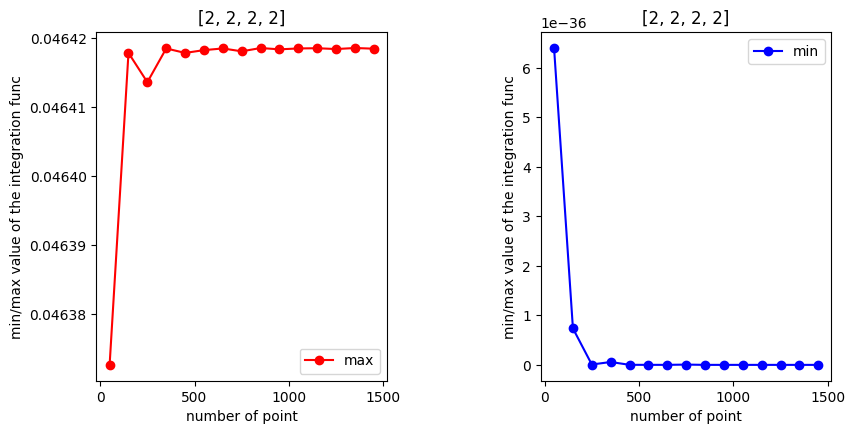

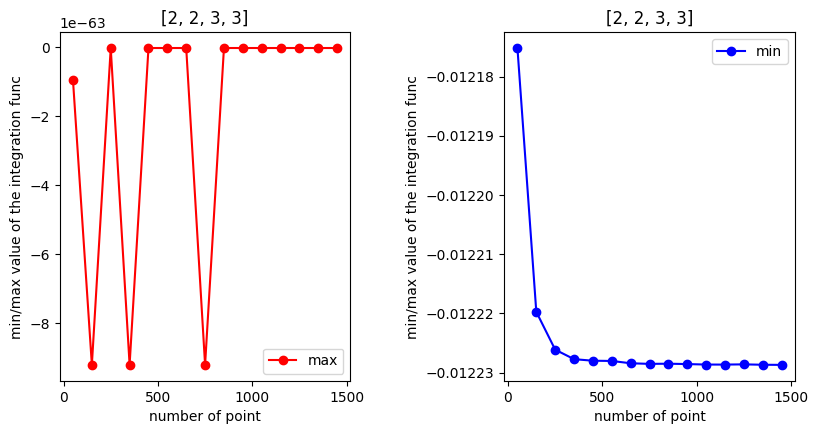

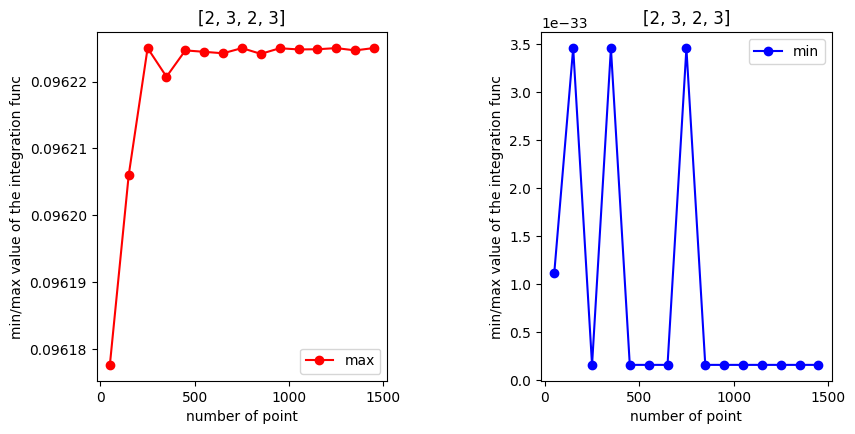

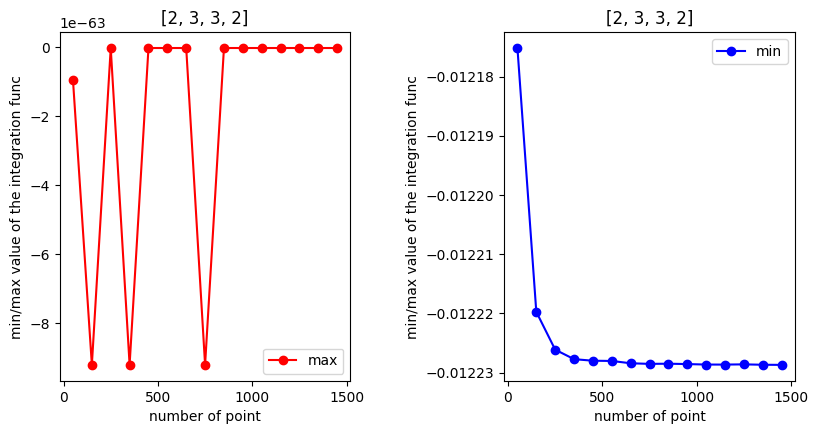

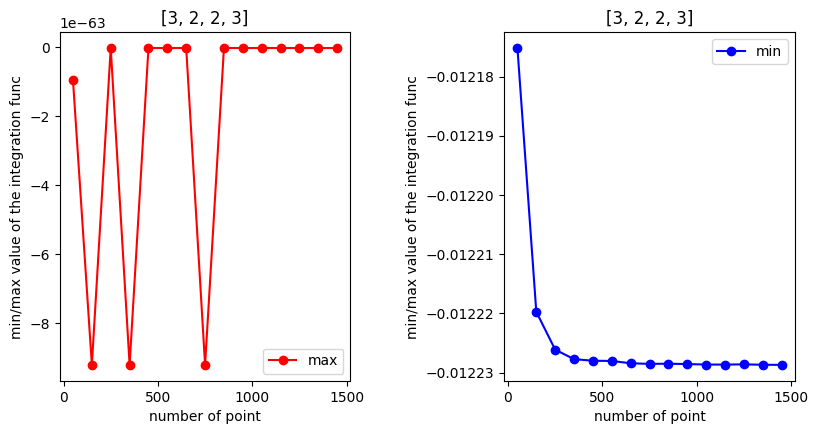

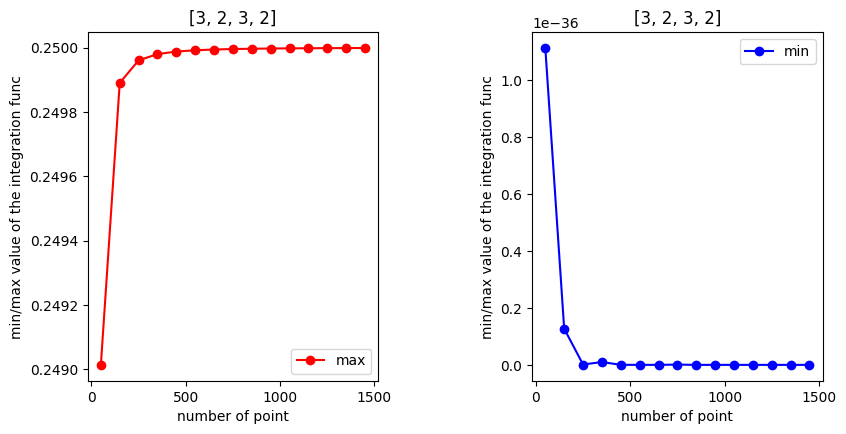

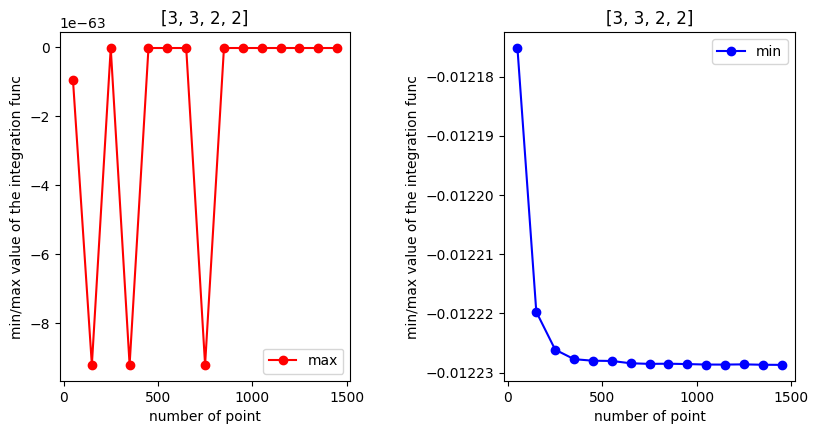

In [ ]:
# N = np.arange(100, 1100, 100)
N = np.arange(50, 1550, 100)
AR = [1, 1, 1]

# comp = [[1,1,1,1], [1,1,2,2], [3,3,1,1], [3,1,3,1], [1,2,1,2]]
comp = [[1,2,2,1], [1,3,3,1], [2,2,2,2], [2,2,3,3], [2,3,2,3], [2,3,3,2], [3,2,2,3], [3,2,3,2], [3,3,2,2]]
comp_minus_1 = list(map(lambda x: tuple([i - 1 for i in x]), comp))


for ij in comp_minus_1:

  figure, axis = plt.subplots(1, 2, figsize=(10, 6))
  figure.tight_layout(pad=8.0)

  min_value, max_value = [], []

  for i in N:

    value_θ, value_φ, res = [], [], []
    integration_tr_n(C_c, AR, i, ij)
    max_value.append(max(res))
    min_value.append(min(res))

  axis[0].plot(N, max_value, color='red', marker='o', label='max')
  axis[0].set_title([x+1 for x in ij])
  axis[0].set_ylabel('min/max value of the integration func')
  axis[0].set_xlabel('number of point')
  axis[0].legend()


  axis[1].plot(N, min_value, color='blue', marker='o', label='min')
  axis[1].set_title([x+1 for x in ij])
  axis[1].set_ylabel('min/max value of the integration func')
  axis[1].set_xlabel('number of point')
  axis[1].legend()
  plt.show()

In [ ]:
def integration_tr_modified(C_c, ar, N, comp):

    A_klnm = np.empty((3, 3, 3, 3))


    A_klnm1, A_klnm2 = np.empty((3, 3, 3, 3)), np.empty((3, 3, 3, 3))

    # Define the limits of integration
    a, b = 0, np.pi/2
    c, d = 0, 2*np.pi #φ

    m, n = N, N  # Number of steps
    # m, n = 2, 30000  # Number of steps
    dx = (b - a) / m
    dy = (d - c) / n

    result = 0

    for ii in range(1, m):
      for jj in range(1, n):
        # print(a + ii * dx,  c + jj * dy)
        givenFunction(C_c, a + ii * dx, c + jj * dy,ar, comp)


    a, b = np.pi/2, np.pi
    c, d = 0, 2*np.pi #φ

    m, n = N, N  # Number of steps
    # m, n = 2, 30000  # Number of steps
    dx = (b - a) / m
    dy = (d - c) / n

    result = 0

    for ii in range(1, m):
      for jj in range(1, n):
        # print(a + ii * dx,  c + jj * dy)
        givenFunction(C_c, a + ii * dx, c + jj * dy,ar, comp)



    return A_klnm

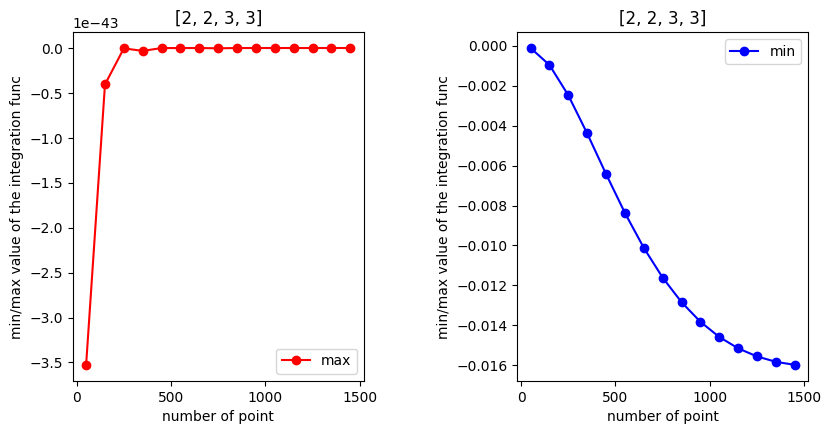

In [ ]:
# N = np.arange(100, 1100, 100)
N = np.arange(50, 1550, 100)
AR = [1000, 1000, 1]

# comp = [[1,1,1,1], [1,1,2,2], [3,3,1,1], [3,1,3,1], [1,2,1,2]]
# comp = [[1,2,2,1], [1,3,3,1], [2,2,2,2], [2,2,3,3], [2,3,2,3], [2,3,3,2], [3,2,2,3], [3,2,3,2], [3,3,2,2]]
comp = [[2,2,3,3]]
comp_minus_1 = list(map(lambda x: tuple([i - 1 for i in x]), comp))


for ij in comp_minus_1:

  figure, axis = plt.subplots(1, 2, figsize=(10, 6))
  figure.tight_layout(pad=8.0)

  min_value, max_value = [], []

  for i in N:

    value_θ, value_φ, res = [], [], []
    integration_tr_modified(C_c, AR, i, ij)
    max_value.append(max(res))
    min_value.append(min(res))

  axis[0].plot(N, max_value, color='red', marker='o', label='max')
  axis[0].set_title([x+1 for x in ij])
  axis[0].set_ylabel('min/max value of the integration func')
  axis[0].set_xlabel('number of point')
  axis[0].legend()


  axis[1].plot(N, min_value, color='blue', marker='o', label='min')
  axis[1].set_title([x+1 for x in ij])
  axis[1].set_ylabel('min/max value of the integration func')
  axis[1].set_xlabel('number of point')
  axis[1].legend()
  plt.show()

### Аналитический метод integrate.dblquad

In [ ]:
def integration(C_c, ar):

  A_klnm = np.empty((3,3,3,3))


  for i in range(3):
      for j in range(3):
          for k in range(3):
              for l in range(3):

                  A_klnm[i,j,k,l], _ = integrate.dblquad(lambda θ, φ: givenFunction(C_c, θ, φ, ar)[i,j,k,l], 1.57, 1.57, \
                                                      lambda x: 0, lambda x: np.pi, epsabs=1.49e-8, epsrel=1.49e-8)
  A_klnm = -1 /(4*np.pi)*A_klnm

  return A_klnm

In [ ]:
value, res = [], []

In [ ]:
AR = [1, 1, 1]
A1 = integration(C_c, AR)

In [ ]:
len(value), len(res)

(382347, 382347)

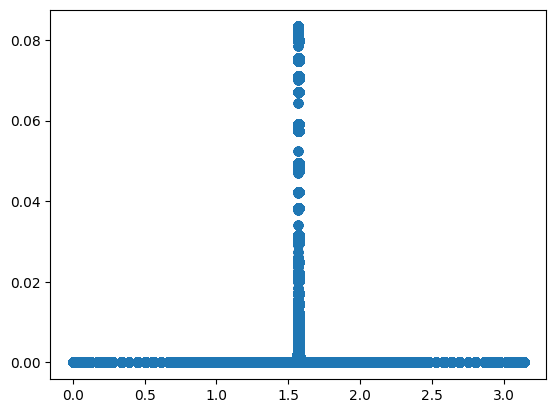

In [ ]:
plt.scatter(value,res)

# Расчет эффективного $C_{ij}$

In [79]:
def bulk_mdl(p, vp, vs):

    K = list(map(lambda x, y, z: x * (y**2 - 4/3*z**2), p, vp, vs))
    μ = list(map(lambda x, z: x * z**2, p, vs))

    return K, μ

In [80]:
pm, pfl = 2.71, 0.999
vpm, vsm = 5.77, 3.18
vpfl, vsfl = 1.31, 10**-8

print(bulk_mdl([pm, pfl], [vpm, vpfl],[vsm, vsfl]))

([53.68428699999999, 1.7143838999999998], [27.404604000000003, 9.99e-17])


In [131]:
"""Матрица"""

k, mu = 53.68428699999999, 27.404604000000003
lambda_ = k - 2 * mu / 3
c11 = lambda_ + 2 * mu
c12 = lambda_
c44 = mu

M_C11 = c11
M_C44 = c12
M_C12 = c44


k, mu = 1.7143838999999998,  9.99e-17
lambda_ = k - 2 * mu / 3
c11 = lambda_ + 2 * mu
c12 = lambda_
c44 = mu

Fl_C11 = c11
Fl_C44 = c12
Fl_C12 = c44

C_mtrx = from_6x6_to_3x3x3x3(M_C11, M_C44, M_C12)
C_fl = from_6x6_to_3x3x3x3(Fl_C11, Fl_C44, Fl_C12)

porosity = 0.1
f = 0.1
C_c = (1-f)*C_mtrx+f*C_fl

In [ ]:
# """Матрица"""
# M_C11 = 136
# M_C44 = 12
# M_C12 = 33

# C_mtrx = from_6x6_to_3x3x3x3(M_C11, M_C44, M_C12)
# C_c = C_mtrx

In [90]:
def givenFunction(C_c,θ,φ,ar):

  n_t = np.array([[((np.sin(θ) * np.cos(φ))*ar[0]**-1),
                    (np.sin(θ) * np.sin(φ))*ar[1]**-1,
                    (np.cos(θ)*ar[2]**-1)]])
  n = n_t.T @ n_t
  λ = np.linalg.inv(np.einsum('imjn,mn->ij', C_c, n))

  return np.einsum('mn,ij -> imjn', n, λ)*np.sin(θ)

In [ ]:
def integration_tr_new(C_c, ar):

    A_klnm = np.empty((3, 3, 3, 3))

    # Define the limits of integration
    a, b = 0, np.pi/2
    c, d = 0, 2 * np.pi/2

    # a, b --> θ
    # c, d --> φ

    m, n = 1000,1000  # Number of steps

    dx = (b - a) / m
    dy = (d - c) / n

    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):

                    print(i,j,k,l)

                    result = 0
                    for ii in range(1, m):
                        for jj in range(1, n):
                            result += givenFunction(C_c, a + ii * dx, c + jj * dy, ar)[i, j, k, l]

                    result += 0.5 * (givenFunction(C_c, a, c, ar)[i, j, k, l] + givenFunction(C_c, b, c, ar)[i, j, k, l] +
                                     givenFunction(C_c, a, d, ar)[i, j, k, l] + givenFunction(C_c, b, d, ar)[i, j, k, l])
                    result *= dx * dy

                    A_klnm[i, j, k, l] = -1 / (4 * np.pi) * result
                    # print(i+1, j+1, k+1, l+1, A_klnm[i, j, k, l])

    return 2*A_klnm

In [ ]:
g_m = integration_tr_new(C_c, [1, 1, 1])

0 0 0 0
0 0 0 1
0 0 0 2
0 0 1 0
0 0 1 1
0 0 1 2
0 0 2 0
0 0 2 1
0 0 2 2
0 1 0 0
0 1 0 1
0 1 0 2
0 1 1 0
0 1 1 1
0 1 1 2
0 1 2 0
0 1 2 1
0 1 2 2
0 2 0 0
0 2 0 1
0 2 0 2
0 2 1 0
0 2 1 1
0 2 1 2
0 2 2 0
0 2 2 1
0 2 2 2
1 0 0 0
1 0 0 1
1 0 0 2
1 0 1 0
1 0 1 1
1 0 1 2
1 0 2 0
1 0 2 1
1 0 2 2
1 1 0 0
1 1 0 1
1 1 0 2
1 1 1 0
1 1 1 1
1 1 1 2
1 1 2 0
1 1 2 1
1 1 2 2
1 2 0 0
1 2 0 1
1 2 0 2
1 2 1 0
1 2 1 1
1 2 1 2
1 2 2 0
1 2 2 1
1 2 2 2
2 0 0 0
2 0 0 1
2 0 0 2
2 0 1 0
2 0 1 1
2 0 1 2
2 0 2 0
2 0 2 1
2 0 2 2
2 1 0 0
2 1 0 1
2 1 0 2
2 1 1 0
2 1 1 1
2 1 1 2
2 1 2 0
2 1 2 1
2 1 2 2
2 2 0 0
2 2 0 1
2 2 0 2
2 2 1 0
2 2 1 1
2 2 1 2
2 2 2 0
2 2 2 1
2 2 2 2


In [ ]:
g_m.resize(9,9)
np.round(g_m, 6)

array([[-0.002681,  0.      ,  0.      , -0.      ,  0.000468,  0.000424,
        -0.      ,  0.000424,  0.000468],
       [ 0.      , -0.007357, -0.004702,  0.000468, -0.      , -0.      ,
         0.000424, -0.      , -0.      ],
       [ 0.      , -0.004702, -0.007361,  0.000424, -0.      , -0.      ,
         0.000468, -0.      , -0.      ],
       [-0.      ,  0.000468,  0.000424, -0.007329, -0.      ,  0.      ,
         0.000614, -0.      ,  0.      ],
       [ 0.000468, -0.      , -0.      , -0.      , -0.002684, -0.002719,
        -0.      ,  0.000648,  0.000468],
       [ 0.000424, -0.      ,  0.      ,  0.      , -0.002719, -0.007351,
         0.      ,  0.000468,  0.000648],
       [-0.      ,  0.000424,  0.000468,  0.000614, -0.      ,  0.      ,
        -0.007334, -0.      ,  0.      ],
       [ 0.000424, -0.      ,  0.      , -0.      ,  0.000648,  0.000468,
        -0.      , -0.007349, -0.002719],
       [ 0.000468,  0.      , -0.      ,  0.      ,  0.000468,  0.000648

In [ ]:
# array([[-0.002681,  0.      ,  0.      , -0.      ,  0.000468,  0.000424,
#         -0.      ,  0.000424,  0.000468],
#        [ 0.      , -0.007357, -0.004702,  0.000468, -0.      , -0.      ,
#          0.000424, -0.      , -0.      ],
#        [ 0.      , -0.004702, -0.007361,  0.000424, -0.      , -0.      ,
#          0.000468, -0.      , -0.      ],
#        [-0.      ,  0.000468,  0.000424, -0.007329, -0.      ,  0.      ,
#          0.000614, -0.      ,  0.      ],
#        [ 0.000468, -0.      , -0.      , -0.      , -0.002684, -0.002719,
#         -0.      ,  0.000648,  0.000468],
#        [ 0.000424, -0.      ,  0.      ,  0.      , -0.002719, -0.007351,
#          0.      ,  0.000468,  0.000648],
#        [-0.      ,  0.000424,  0.000468,  0.000614, -0.      ,  0.      ,
#         -0.007334, -0.      ,  0.      ],
#        [ 0.000424, -0.      ,  0.      , -0.      ,  0.000648,  0.000468,
#         -0.      , -0.007349, -0.002719],
#        [ 0.000468,  0.      , -0.      ,  0.      ,  0.000468,  0.000648,
#          0.      , -0.002719, -0.002684]])

In [ ]:
def integration_tr(C_c, ar):
    A_klnm = np.empty((3, 3, 3, 3))

    # Define the limits of integration
    a, b = 0, np.pi
    c, d = 0, 2 * np.pi
    m, n = 500,500  # Number of steps
    dx = (b - a) / m
    dy = (d - c) / n

    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):

                    result = 0
                    for ii in range(1, m):
                        for jj in range(1, n):
                            result += givenFunction(C_c, a + ii * dx, c + jj * dy, ar)[i, j, k, l]

                    result += 0.5 * (givenFunction(C_c, a, c, ar)[i, j, k, l] + givenFunction(C_c, b, c, ar)[i, j, k, l] +
                                     givenFunction(C_c, a, d, ar)[i, j, k, l] + givenFunction(C_c, b, d, ar)[i, j, k, l])
                    result *= dx * dy

                    A_klnm[i, j, k, l] = -1 / (4 * np.pi) * result
                    # print(i+1, j+1, k+1, l+1, A_klnm[i, j, k, l])

    return A_klnm

In [ ]:
g_m = integration_tr(C_c, [1, 1, 1])

In [ ]:
g_m.resize(9,9)
np.round(g_m, 6)

array([[-0.005359,  0.      , -0.      ,  0.      ,  0.000937, -0.      ,
         0.      ,  0.      ,  0.000934],
       [ 0.      , -0.01473 , -0.      ,  0.000937, -0.      ,  0.      ,
         0.      , -0.      , -0.      ],
       [-0.      , -0.      , -0.014713, -0.      ,  0.      ,  0.      ,
         0.000934, -0.      , -0.      ],
       [ 0.      ,  0.000937, -0.      , -0.014619, -0.      ,  0.      ,
         0.      , -0.      ,  0.      ],
       [ 0.000937, -0.      ,  0.      , -0.      , -0.005373, -0.      ,
        -0.      , -0.      ,  0.000937],
       [-0.      ,  0.      ,  0.      ,  0.      , -0.      , -0.014674,
         0.      ,  0.000937,  0.      ],
       [ 0.      ,  0.      ,  0.000934,  0.      , -0.      ,  0.      ,
        -0.014671, -0.      ,  0.      ],
       [ 0.      , -0.      , -0.      , -0.      , -0.      ,  0.000937,
        -0.      , -0.01473 , -0.      ],
       [ 0.000934, -0.      ,  0.      ,  0.      ,  0.000937,  0.      

In [132]:
def integration(C_c, ar):

  A_klnm = np.empty((3,3,3,3))

  for i in range(3):
      for j in range(3):
          for k in range(3):
              for l in range(3):

                if i==j==k==l==0 or i==j==k==l==1 or i==j==k==l==2 or (i==j==0 and k==l==1) or (i==j==0 and k==l==2) or \
                  (i==j==1 and k==l==0) or (i==j==2 and k==l==0) or \
                  (i==j==2 and k==l==0) or (i==j==2 and k==l==1)or\
                  (i==j==1 and k==l==2) or \
                  (i==1 and j==2 and k==1 and l==2) or (i==2 and j==1 and k==2 and l==1) or\
                  (i==1 and j==2 and k==2 and l==1) or (i==2 and j==1 and k==1 and l==2) or\
                  (i==0 and j==2 and k==0 and l==2) or (i==2 and j==0 and k==2 and l==0) or\
                  (i==2 and j==0 and  k==0 and l==2) or (i==0 and j==2 and k==2 and l==0) or\
                  (i==0 and j==1 and k==0 and l==1) or (i==1 and j==0 and k==1 and l==0) or\
                  (i==1 and j==0 and k==0 and l==1) or (i==0 and j==1 and k==1 and l==0):

                  A_klnm[i,j,k,l], _ = integrate.dblquad(lambda θ, φ: givenFunction(C_c, θ, φ, ar)[i,j,k,l], 0, 2*np.pi, \
                                                      lambda x: 0, lambda x: np.pi, epsabs=1.49e-8, epsrel=1.49e-8)
                  # print(i+1, j+1, k+1, l+1,  A_klnm[i,j,k,l]*(-1 /(4*np.pi)))
                else:
                  A_klnm[i,j,k,l] = 0.



  A_klnm = (-1/(4*np.pi))*A_klnm

  g = np.empty((3,3,3,3))

  for i in range(3):
      for j in range(3):
          for k in range(3):
              for l in range(3):
                g[i,j,k,l] = (A_klnm[i,k,l,j]+A_klnm[i,l,k,j]+A_klnm[j,k,l,i]+A_klnm[j,l,k,i])*0.25

  return g

In [110]:
g_m = integration(C_c, [10, 10, 1])

KeyboardInterrupt: 

In [107]:
g_m.resize(9,9)

In [108]:
g_m

array([[-0.0015309 , -0.        , -0.        , -0.        ,  0.00019378,
        -0.        , -0.        , -0.        ,  0.00062629],
       [-0.        , -0.00082242, -0.        , -0.00082242, -0.        ,
        -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.00604881, -0.        , -0.        ,
        -0.        , -0.00604881, -0.        , -0.        ],
       [-0.        , -0.00082242, -0.        , -0.00082242, -0.        ,
        -0.        , -0.        , -0.        , -0.        ],
       [ 0.00019378, -0.        , -0.        , -0.        , -0.0015309 ,
        -0.        , -0.        , -0.        ,  0.00062629],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.00604881, -0.        , -0.00604881, -0.        ],
       [-0.        , -0.        , -0.00604881, -0.        , -0.        ,
        -0.        , -0.00604881, -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0

In [ ]:
g_m.resize(9,9)
np.round(g_m, 6)

array([[-2.4000e-04, -0.0000e+00,  0.0000e+00, -0.0000e+00,  2.0000e-05,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  6.6000e-05],
       [-0.0000e+00, -2.0300e-04, -0.0000e+00, -2.0300e-04,  0.0000e+00,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00],
       [ 0.0000e+00, -0.0000e+00, -2.0146e-02, -0.0000e+00,  0.0000e+00,
         0.0000e+00, -2.0146e-02,  0.0000e+00, -0.0000e+00],
       [-0.0000e+00, -2.0300e-04, -0.0000e+00, -2.0300e-04,  0.0000e+00,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00],
       [ 2.0000e-05,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.4000e-04,
        -0.0000e+00,  0.0000e+00, -0.0000e+00,  6.6000e-05],
       [ 0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -2.0146e-02, -0.0000e+00, -2.0146e-02,  0.0000e+00],
       [ 0.0000e+00, -0.0000e+00, -2.0146e-02, -0.0000e+00,  0.0000e+00,
         0.0000e+00, -2.0146e-02,  0.0000e+00, -0.0000e+00],
       [ 0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0

In [ ]:

array([[-2.3600e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.0000e-05,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  6.5000e-05],
       [ 0.0000e+00, -1.9900e-04,  0.0000e+00, -1.9900e-04,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00, -1.9839e-02,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -1.9839e-02,  0.0000e+00,  0.0000e+00],
       [ 0.0000e+00, -1.9900e-04,  0.0000e+00, -1.9900e-04,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.0000e-05,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.4000e-04,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  6.6000e-05],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -1.9833e-02,  0.0000e+00, -1.9833e-02,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00, -1.9839e-02,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -1.9839e-02,  0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -1.9833e-02,  0.0000e+00, -1.9833e-02,  0.0000e+00],
       [ 6.5000e-05,  0.0000e+00,  0.0000e+00,  0.0000e+00,  6.6000e-05,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -7.2480e-03]])

array([[-0.006296, -0.      ,  0.      , -0.      ,  0.001362, -0.      ,
         0.      , -0.      ,  0.001362],
       [-0.      , -0.003577,  0.      , -0.003577,  0.      ,  0.      ,
         0.      ,  0.      , -0.      ],
       [-0.      ,  0.      , -0.003577,  0.      ,  0.      ,  0.      ,
        -0.003577,  0.      , -0.      ],
       [-0.      , -0.003577,  0.      , -0.003577,  0.      ,  0.      ,
         0.      ,  0.      , -0.      ],
       [ 0.001362,  0.      , -0.      ,  0.      , -0.006296, -0.      ,
        -0.      , -0.      ,  0.001362],
       [-0.      , -0.      , -0.      , -0.      , -0.      , -0.003577,
        -0.      , -0.003577,  0.      ],
       [-0.      ,  0.      , -0.003577,  0.      ,  0.      ,  0.      ,
        -0.003577,  0.      , -0.      ],
       [-0.      , -0.      , -0.      , -0.      , -0.      , -0.003577,
        -0.      , -0.003577,  0.      ],
       [ 0.001362, -0.      , -0.      , -0.      ,  0.001362, -0.      

In [ ]:
g_m = integration_tr(C_c, [1, 1, 1])
g_m.resize(9,9)
np.round(g_m, 6)

array([[-0.006276, -0.      , -0.      ,  0.      ,  0.001362,  0.      ,
        -0.      , -0.      ,  0.001357],
       [-0.      , -0.008516,  0.      ,  0.001362,  0.      ,  0.      ,
        -0.      ,  0.      ,  0.      ],
       [-0.      ,  0.      , -0.008501,  0.      ,  0.      , -0.      ,
         0.001357,  0.      ,  0.      ],
       [ 0.      ,  0.001362,  0.      , -0.008478, -0.      , -0.      ,
        -0.      ,  0.      ,  0.      ],
       [ 0.001362,  0.      , -0.      , -0.      , -0.006296,  0.      ,
         0.      ,  0.      ,  0.001362],
       [ 0.      , -0.      , -0.      , -0.      ,  0.      , -0.008497,
         0.      ,  0.001362,  0.      ],
       [-0.      , -0.      ,  0.001357, -0.      , -0.      ,  0.      ,
        -0.008482, -0.      , -0.      ],
       [-0.      ,  0.      ,  0.      , -0.      ,  0.      ,  0.001362,
        -0.      , -0.008516, -0.      ],
       [ 0.001357,  0.      ,  0.      ,  0.      ,  0.001362,  0.      

In [ ]:
# g_m.resize(9,9)
B_m = np.linalg.inv(g_m)

In [ ]:
g_m@B_m

array([[ 1.00000000e+00,  2.00000000e+00, -1.34762289e-19,
        -2.00000000e+00,  1.14892942e-16, -4.06453353e+00,
         0.00000000e+00,  4.06453353e+00, -5.79103924e-16],
       [ 6.94866048e-34, -7.89161695e+15,  3.16453623e-36,
         7.89161695e+15, -3.49306896e+00,  1.09229048e+16,
         0.00000000e+00, -1.09229048e+16,  1.74482502e+01],
       [ 5.82379644e-17,  3.12627806e-19,  1.00000000e+00,
         0.00000000e+00, -1.03511113e-16,  3.45647669e-19,
         0.00000000e+00, -3.45647669e-19, -1.48469286e-15],
       [ 6.67561423e-34, -7.89161695e+15,  3.16453623e-36,
         7.89161695e+15, -3.49306896e+00,  1.09229048e+16,
         0.00000000e+00, -1.09229048e+16,  1.74482502e+01],
       [-3.90831944e-19, -2.18750000e+00, -1.34762289e-19,
         2.18750000e+00,  1.00000000e+00, -1.84578353e+00,
         0.00000000e+00,  1.84578353e+00,  4.47852374e-16],
       [ 2.09683373e-33, -2.63576778e-02,  2.03010334e-36,
         0.00000000e+00, -1.10546447e-17,  4.738236

In [ ]:
 def integration_t(C_c, ar):

  A_klnm_t = np.empty((3,3,3,3))

  A_klnm_t1, A_klnm_t2, A_klnm_t3, A_klnm_t4, A_klnm_t5  = np.empty((3,3,3,3)), np.empty((3,3,3,3)), np.empty((3,3,3,3)), np.empty((3,3,3,3)), np.empty((3,3,3,3))

  for i in range(3):
      for j in range(3):
          for k in range(3):
              for l in range(3):

                A_klnm_t1[i,j,k,l], _ = integrate.dblquad(lambda θ, φ: givenFunction(C_c, θ, φ, ar)[i,j,k,l], 0, 2*np.pi, \
                                                      lambda x: 0, lambda x: 1., epsabs=1.49e-8, epsrel=1.49e-8)

                A_klnm_t2[i,j,k,l], _ = integrate.dblquad(lambda θ, φ: givenFunction(C_c, θ, φ, ar)[i,j,k,l], 0, 2*np.pi, \
                                                      lambda x: 1, lambda x: 1.4, epsabs=1.49e-8, epsrel=1.49e-8)

                A_klnm_t3[i,j,k,l], _ = integrate.dblquad(lambda θ, φ: givenFunction(C_c, θ, φ, ar)[i,j,k,l], 0, 2*np.pi, \
                                                      lambda x: 1.4, lambda x: 1.8, epsabs=1.49e-20, epsrel=1.49e-20)

                A_klnm_t4[i,j,k,l], _ = integrate.dblquad(lambda θ, φ: givenFunction(C_c, θ, φ, ar)[i,j,k,l], 0, 2*np.pi, \
                                                      lambda x: 1.8, lambda x: 2., epsabs=1.49e-20, epsrel=1.49e-20)

                A_klnm_t5[i,j,k,l], _ = integrate.dblquad(lambda θ, φ: givenFunction(C_c, θ, φ, ar)[i,j,k,l], 0, 2*np.pi, \
                                                      lambda x: 2., lambda x: np.pi, epsabs=1.49e-8, epsrel=1.49e-8)

  A_klnm_t = (A_klnm_t1+A_klnm_t2+A_klnm_t3+A_klnm_t4+A_klnm_t5)

  A_klnm = A_klnm_t*(-1/(4*np.pi))

  g = np.empty((3,3,3,3))

  for i in range(3):
      for j in range(3):
          for k in range(3):
              for l in range(3):
                g[i,j,k,l] = (A_klnm[i,k,l,j]+A_klnm[i,l,k,j]+A_klnm[j,k,l,i]+A_klnm[j,l,k,i])*0.25

  return g

In [ ]:
gg = integration_t(C_c, [1000, 1000, 1])

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [144]:
# AR = [10, 10, 1]
g_m = integration(C_c, [1, 1, 1])
g_fl = integration(C_c, [100, 100, 1])

In [134]:
g_m, g_fl

(array([[[[-0.00697325, -0.        , -0.        ],
          [-0.        ,  0.00150787, -0.        ],
          [-0.        , -0.        ,  0.00150787]],
 
         [[-0.        , -0.0039557 , -0.        ],
          [-0.0039557 , -0.        , -0.        ],
          [-0.        , -0.        , -0.        ]],
 
         [[-0.        , -0.        , -0.0039557 ],
          [-0.        , -0.        , -0.        ],
          [-0.0039557 , -0.        , -0.        ]]],
 
 
        [[[-0.        , -0.0039557 , -0.        ],
          [-0.0039557 , -0.        , -0.        ],
          [-0.        , -0.        , -0.        ]],
 
         [[ 0.00150787, -0.        , -0.        ],
          [-0.        , -0.00697325, -0.        ],
          [-0.        , -0.        ,  0.00150787]],
 
         [[-0.        , -0.        , -0.        ],
          [-0.        , -0.        , -0.0039557 ],
          [-0.        , -0.0039557 , -0.        ]]],
 
 
        [[[-0.        , -0.        , -0.0039557 ],
       

In [135]:
I = np.einsum('ik,jl->ijkl', np.eye(3), np.eye(3)) # identity tensor


A_m, B_m, num_mtrx = np.empty((3,3,3,3)), np.empty((3,3,3,3)), np.empty((3,3,3,3))
A_fl, B_fl, num_fl = np.empty((3,3,3,3)), np.empty((3,3,3,3)), np.empty((3,3,3,3))
dnmntr = np.empty((3,3,3,3))
rslt_num, rslt_dnmntr = np.empty((3,3,3,3)), np.empty((3,3,3,3))


In [137]:
A_m = (I - g_m@(C_mtrx - C_c))

A_mm = (I - (np.einsum('ijmn,mnkl->ijkl', g_m, C_mtrx - C_c)))

A_m.resize(9,9)
print(A_m)

A_mm.resize(9,9)
print(A_mm)

A_m - A_mm

[[ 1.06172024  0.          0.          0.         -0.00413158  0.
   0.          0.         -0.00413158]
 [ 0.01333069  1.          0.          0.          0.01333069  0.
   0.          0.          0.        ]
 [ 0.01333069  0.          1.          0.          0.          0.
   0.          0.          0.01333069]
 [ 0.01333069  0.          0.          1.          0.01333069  0.
   0.          0.          0.        ]
 [-0.00413158  0.          0.          0.          1.06172024  0.
   0.          0.         -0.00413158]
 [ 0.          0.          0.          0.          0.01333069  1.
   0.          0.          0.01333069]
 [ 0.01333069  0.          0.          0.          0.          0.
   1.          0.          0.01333069]
 [ 0.          0.          0.          0.          0.01333069  0.
   0.          1.          0.01333069]
 [-0.00413158  0.          0.          0.         -0.00413158  0.
   0.          0.          1.06172024]]
[[1.05345709 0.         0.         0.         0.001628

array([[ 0.00826315,  0.        ,  0.        ,  0.        , -0.00576051,
         0.        ,  0.        ,  0.        , -0.00576051],
       [ 0.01333069, -0.02666139,  0.        , -0.02666139,  0.01333069,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01333069,  0.        , -0.02666139,  0.        ,  0.        ,
         0.        , -0.02666139,  0.        ,  0.01333069],
       [ 0.01333069, -0.02666139,  0.        , -0.02666139,  0.01333069,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00576051,  0.        ,  0.        ,  0.        ,  0.00826315,
         0.        ,  0.        ,  0.        , -0.00576051],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01333069,
        -0.02666139,  0.        , -0.02666139,  0.01333069],
       [ 0.01333069,  0.        , -0.02666139,  0.        ,  0.        ,
         0.        , -0.02666139,  0.        ,  0.01333069],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [145]:
I = np.einsum('ik,jl->ijkl', np.eye(3), np.eye(3)) # identity tensor


A_m, B_m, num_mtrx = np.empty((3,3,3,3)), np.empty((3,3,3,3)), np.empty((3,3,3,3))
A_fl, B_fl, num_fl = np.empty((3,3,3,3)), np.empty((3,3,3,3)), np.empty((3,3,3,3))
dnmntr = np.empty((3,3,3,3))
rslt_num, rslt_dnmntr = np.empty((3,3,3,3)), np.empty((3,3,3,3))

    ### Числитель
# matrix
# A_m = (I - g_m@(C_mtrx - C_c))
A_m = (I - (np.einsum('ijmn,mnkl->ijkl', g_m, C_mtrx - C_c)))


A_m.resize(9,9)
B_m = np.linalg.inv(A_m)
B_m.resize(3,3,3,3)
# num_mtrx = (1-porosity)*np.einsum('ijmn,mnkl->ijkl', C_mtrx, B_m)


# mtrx= C_mtrx@B_m
# mtrx.resize(9,9)
# print(mtrx)
# num_mtrx = (1-porosity)*np.einsum('ijmn,mnkl->ijkl', C_mtrx, B_m)
num_mtrx = (1-porosity)*np.einsum('ijmn,mnkl->ijkl', C_mtrx, B_m)


# fluid
# A_fl = (I - g_fl@(C_fl- C_c))
A_fl = (I - (np.einsum('ijmn,mnkl->ijkl', g_fl, C_fl - C_c)))
A_fl.resize(9,9)
B_fl = np.linalg.inv(A_fl)
B_fl.resize(3,3,3,3)
num_fl = porosity*np.einsum('ijmn,mnkl->ijkl', C_fl, B_fl)

rslt_num = num_mtrx + num_fl


 ### Знаменатель

dnmntr = (1-porosity)*B_m+porosity*B_fl
dnmntr.resize(9,9)
rslt_dnmntr = np.linalg.inv(dnmntr)
rslt_dnmntr.resize(3,3,3,3)


    ### Эффективное значение
eff = np.einsum('ijmn,mnkl->ijkl', rslt_num, rslt_dnmntr)
eff.resize(9,9)
print(np.round(eff, 5))

[[74.98018  0.       0.       0.      18.62334  0.       0.       0.
   5.52168]
 [ 0.      31.83912  0.      31.83912  0.       0.       0.       0.
   0.     ]
 [ 0.       0.      14.24515  0.       0.       0.      14.24515  0.
   0.     ]
 [ 0.      31.83912  0.      31.83912  0.       0.       0.       0.
   0.     ]
 [18.62334  0.       0.       0.      74.98018  0.       0.       0.
   5.52168]
 [ 0.       0.       0.       0.       0.      14.24515  0.      14.24515
   0.     ]
 [ 0.       0.      14.24515  0.       0.       0.      14.24515  0.
   0.     ]
 [ 0.       0.       0.       0.       0.      14.24515  0.      14.24515
   0.     ]
 [ 5.41479  0.       0.       0.       5.41479  0.       0.       0.
  18.95325]]


In [127]:
A_m-A_mm

ValueError: operands could not be broadcast together with shapes (9,9) (3,3,3,3) 

In [146]:
def prst_mix(p, f):
    density = np.round(f[0] * p[0] + f[1] *p[1], 2)
    return density

density_eff = (prst_mix([pm, pfl], [1-porosity, porosity]))

c11, c44 = 76.67639, 3.301730e+01
K, mu = c11+2*c44/3-2*c44, c44

Vp_m = np.sqrt((K + 4/3*mu)/ density_eff)
Vs_m = np.sqrt(mu/density_eff)
Vp_m, Vs_m

(5.624530076608815, 3.6054038619652604)

In [ ]:
[[76.67639  0.       0.       0.      20.91443  0.       0.       0.
  13.13894]
 [ 0.      31.49217  0.      31.49217  0.       0.       0.       0.
   0.     ]
 [ 0.       0.      22.51452  0.       0.       0.      22.51452  0.
   0.     ]
 [ 0.      31.49217  0.      31.49217  0.       0.       0.       0.
   0.     ]
 [20.91443  0.       0.       0.      76.67639  0.       0.       0.
  13.13894]
 [ 0.       0.       0.       0.       0.      22.51452  0.      22.51452
   0.     ]
 [ 0.       0.      22.51452  0.       0.       0.      22.51452  0.
   0.     ]
 [ 0.       0.       0.       0.       0.      22.51452  0.      22.51452
   0.     ]
 [13.07143  0.       0.       0.      13.07143  0.       0.       0.
  40.7866 ]]
(5.624530076608815, 3.6054038619652604)

[[74.98018  0.       0.       0.      18.62334  0.       0.       0.
   5.52168]
 [ 0.      31.83912  0.      31.83912  0.       0.       0.       0.
   0.     ]
 [ 0.       0.      14.24515  0.       0.       0.      14.24515  0.
   0.     ]
 [ 0.      31.83912  0.      31.83912  0.       0.       0.       0.
   0.     ]
 [18.62334  0.       0.       0.      74.98018  0.       0.       0.
   5.52168]
 [ 0.       0.       0.       0.       0.      14.24515  0.      14.24515
   0.     ]
 [ 0.       0.      14.24515  0.       0.       0.      14.24515  0.
   0.     ]
 [ 0.       0.       0.       0.       0.      14.24515  0.      14.24515
   0.     ]
 [ 5.41479  0.       0.       0.       5.41479  0.       0.       0.
  18.95325]]

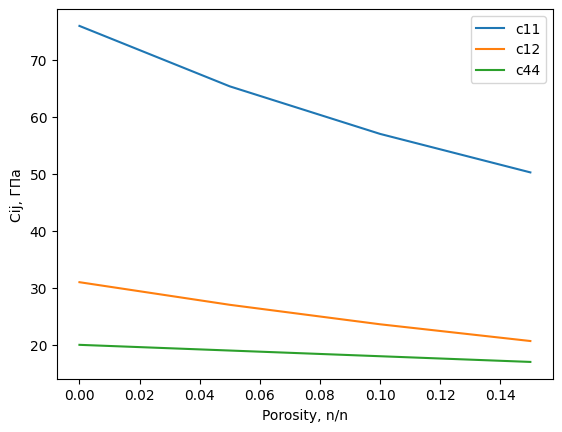

In [ ]:
por = [0, 0.05, 0.1, 0.15]
c11 = [76, 65.39, 57.04, 50.28]
c12 = [31, 27.03, 23.61, 20.67]
c44 = [20, 19, 18, 17]


plt.plot(por, c11, label='c11')
plt.plot(por, c12, label='c12')
plt.plot(por, c44, label='c44')
plt.xlabel('Porosity, n/n')
plt.ylabel('Cij, ГПа')
plt.legend()